<a href="https://colab.research.google.com/github/YangTaeSung/CAU-MachineLearning/blob/master/assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100
18


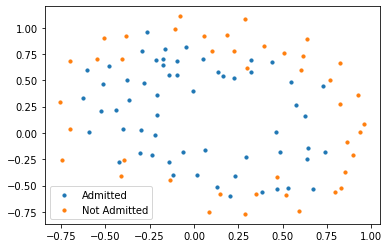

,feature1,feature2,faulty
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin_tnc
import matplotlib.pyplot as pp
%matplotlib inline

def load_data(path, header):
    marks_df = pd.read_csv(path, header=header, names = ['feature1', 'feature2', 'faulty'])
    return marks_df

# load the data from the file
load_data = load_data("data-nonlinear.txt", None)
    
data = load_data[:100] # 100번 인덱스까지 training data
testing_data = load_data.iloc[100:118, 0:3] # 나머지 testing data

print(len(data))
print(len(testing_data))

# xy = feature values, all the columns except the last column
xy = data.iloc[:, :-1]

# label = target values, last column of the data frame
label = data.iloc[:, -1]

# filter out the applicants that got admitted
admitted = data.loc[label == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[label == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()
    
load_data.head()
    

In [162]:
# get the features
X = data.iloc[:, :2]
X.head()

,feature1,feature2
0,0.051267,0.69956
1,-0.092742,0.68494
2,-0.213710,0.69225
3,-0.375000,0.50219
4,-0.513250,0.46564


In [163]:
# define function to map higher order polynomial features
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    
    return res


'\n# theta값 초기화\ntheta = []\n\n\nfor i in range(m):\n  theta.append(0)\n  '

In [0]:
degree = 6

In [0]:
X_poly = mapFeature(X.iloc[:, 0], X.iloc[:, 1], degree)

In [166]:
y = data.iloc[:, 2]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: faulty, dtype: int64

In [167]:
def sigmoid(z):
    # 0과 1 사이의 모든 실제 값을 매핑하는 데 사용되는 활성화 함수 (sigmoid)
    return 1 / (1 + np.exp(-z))

def costFunc(theta, X, y):
    m = y.shape[0]
    z = X.dot(theta)
    h = sigmoid(z)
    term1 = y * np.log(h)
    term2 = (1- y) * np.log(1 - h)
    J = -np.sum(term1 + term2, axis = 0) / m
    return J 


'\ndef costFunction(thetaArray, trainArray, labelArray):\n    J = (-1/m) * np.sum(np.multiply(labelArray, np.log(sigmoid(np.multiply(trainArray,thetaArray)))) + np.multiply((1-labelArray), np.log(1 - sigmoid(np.multiply(trainArray,thetaArray)))))\n    return J\n    '

In [0]:
# Set initial values for our parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

In [169]:
# Now call the optimization routine
#NOTE: This automatically picks the learning rate
from scipy.optimize import minimize
res = minimize(costFunc, initial_theta, args=(X_poly, y))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [0]:
# our optimizated coefficients
theta = res.x

In [0]:
def plotDecisionBoundary(theta,degree, axes):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    axes.legend(labels=['good', 'faulty', 'Decision Boundary'])
    return cs

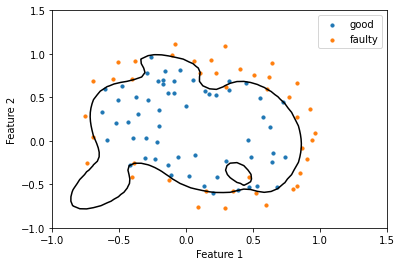

In [172]:
# Plot Decision boundary
fig, axes = pp.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
#axes.legend(title='Legend', loc = 'best' )

plotDecisionBoundary(theta, degree, axes)

In [0]:
# define the regularized cost function
def costFuncReg(theta, X, y, reg_factor):
    m = y.shape[0]
    z = X.dot(theta)
    h = sigmoid(z)
    term1 = y * np.log(h)
    term2 = (1- y) * np.log(1 - h)
    J = -np.sum(term1 + term2, axis = 0) / m
    
    # Regularization Term
    reg_term = (reg_factor * sum(theta[1:] ** 2)) / (2 * m)
    J = J + reg_term
    return J  